In [96]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import PowerTransformer

In [97]:
df = pd.read_csv('..\\..\\Datasets\\concrete_data.csv')
df.sample()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
613,277.0,0.0,0.0,191.0,0.0,968.0,856.0,3,11.36


In [98]:
df.shape

(1030, 9)

In [99]:
df.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

Checking if the dataset contains any zero or negative data because Box-Cox doesnt work with them

In [100]:
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [101]:
# X = df.drop(columns=['Strength'])
X = df.iloc[:,0:8]
y = df['Strength']
# type(X)
# X.sample()

In [102]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state = 42)

# Linear Regression before Transformation

In [103]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
r2_normal = r2_score(y_test,y_pred)
print(f'Normal r2 score: {r2_normal}')
r2_crossval = np.mean(cross_val_score(lr,X,y,scoring='r2'))
print(f'Crossval r2 score: {r2_crossval}')

Normal r2 score: 0.6275531792314848
Crossval r2 score: 0.4609940491662864


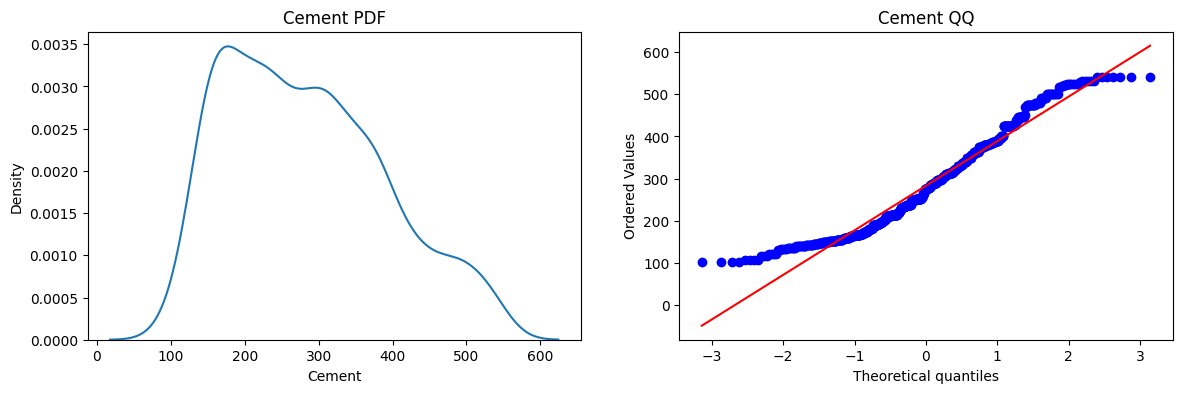

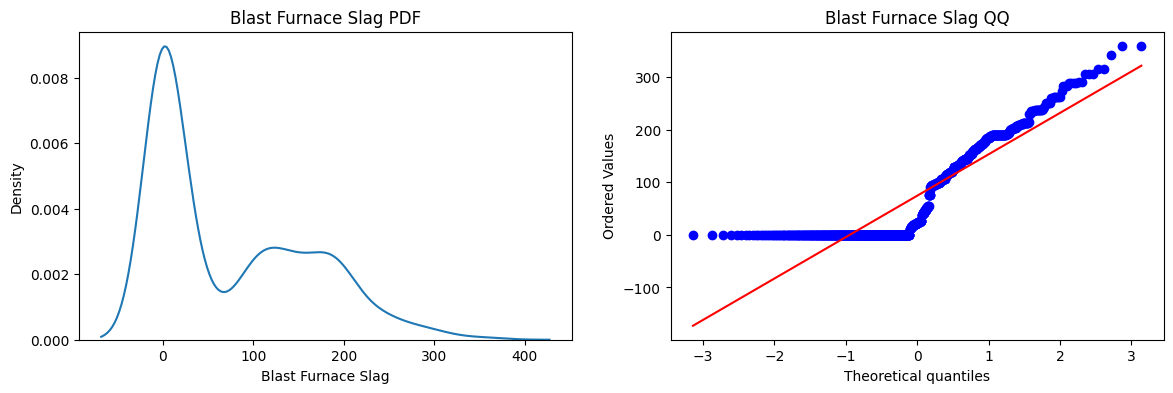

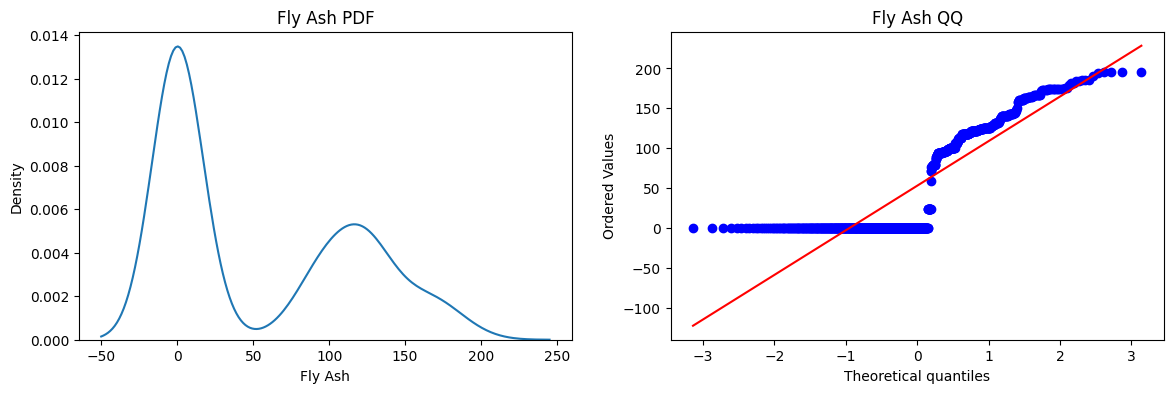

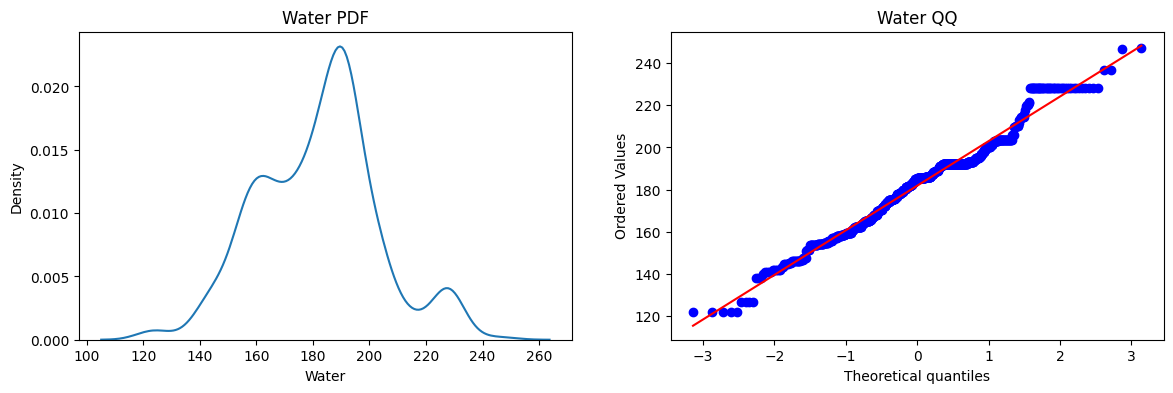

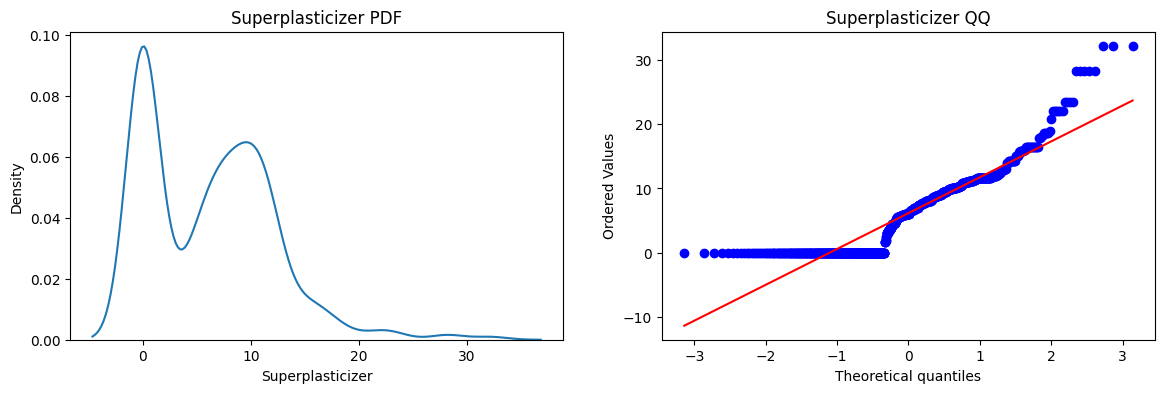

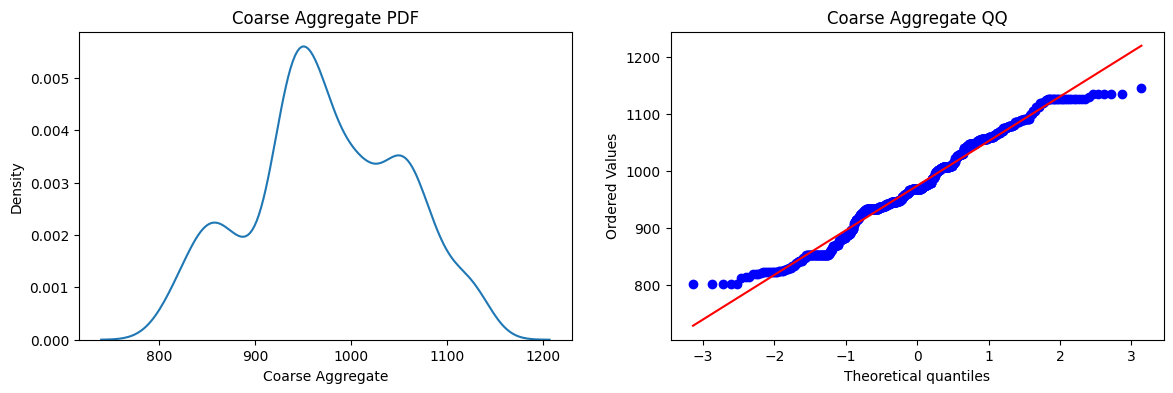

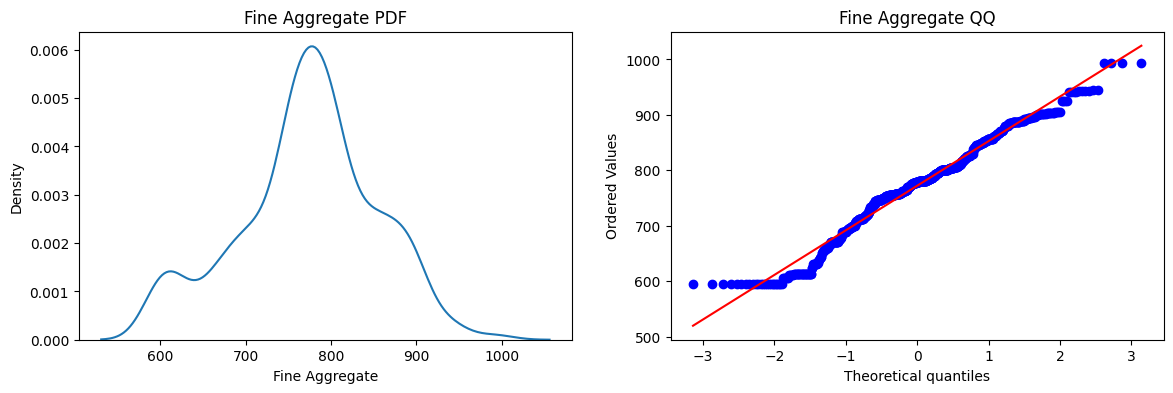

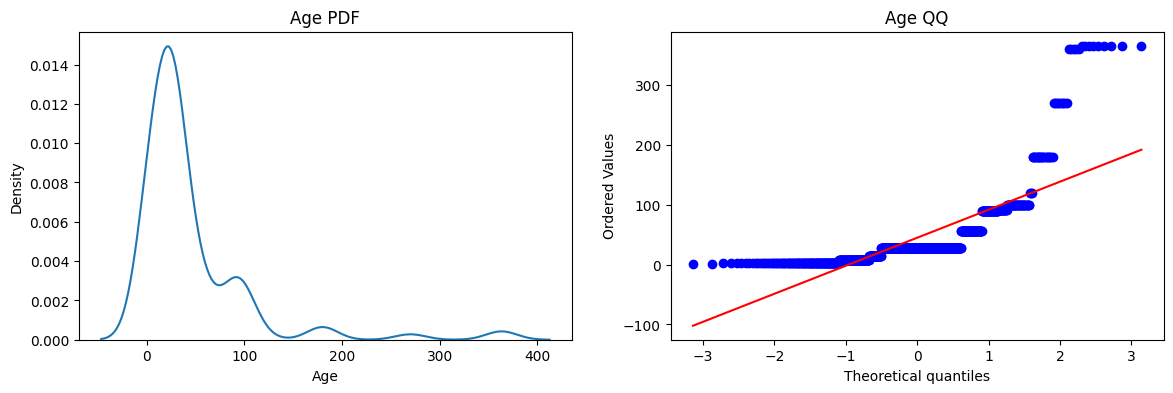

In [104]:
X_train.columns
for col in X_train.columns:
  plt.figure(figsize=(14,4))
  plt.subplot(1,2,1)
  sns.kdeplot(X_train[col])
  plt.title(f'{col} PDF')

  plt.subplot(1,2,2)
  stats.probplot(X_train[col],dist='norm', plot=plt)
  plt.title(f'{col} QQ')

In [105]:
pt = PowerTransformer(method='box-cox')
X_train_transformed = pt.fit_transform(X_train + 0.000001)
X_test_transformed = pt.transform(X_test + 0.000001)
pt.lambdas_

array([ 0.17702535,  0.02509305, -0.03897048,  0.77268158,  0.09881088,
        1.12981303,  1.78201816,  0.06663092])

In [106]:
type(X_train_transformed)

numpy.ndarray

In [107]:
pd.DataFrame({'cols': X_train.columns, 'box-cox_lambdas':pt.lambdas_})

,cols,box-cox_lambdas
0,Cement,0.177025
1,Blast Furnace Slag,0.025093
2,Fly Ash,-0.038970
3,Water,0.772682
4,Superplasticizer,0.098811
5,Coarse Aggregate,1.129813
6,Fine Aggregate,1.782018
7,Age,0.066631


# Linear Regression after Transformation

In [108]:
lr = LinearRegression()
lr.fit(X_train_transformed,y_train)
y_pred = lr.predict(X_test_transformed)
r2_normal = r2_score(y_test, y_pred)
print('Normal r2 score: ', r2_normal)

X_transformed = pt.fit_transform(X+0.000001)
r2_crossval = np.mean(cross_val_score(lr,X_transformed,y,scoring='r2'))
print('Crossval r2 score: ', r2_crossval)

Normal r2 score:  0.8047825005397713
Crossval r2 score:  0.666295031974616


In [109]:
X_train_transformed = pd.DataFrame(X_train_transformed,columns=X_train.columns)
X_train_transformed.sample()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
289,0.937587,0.958238,-0.887212,-1.318848,0.914298,2.060647,-1.946002,1.158862


# Before and After transformation

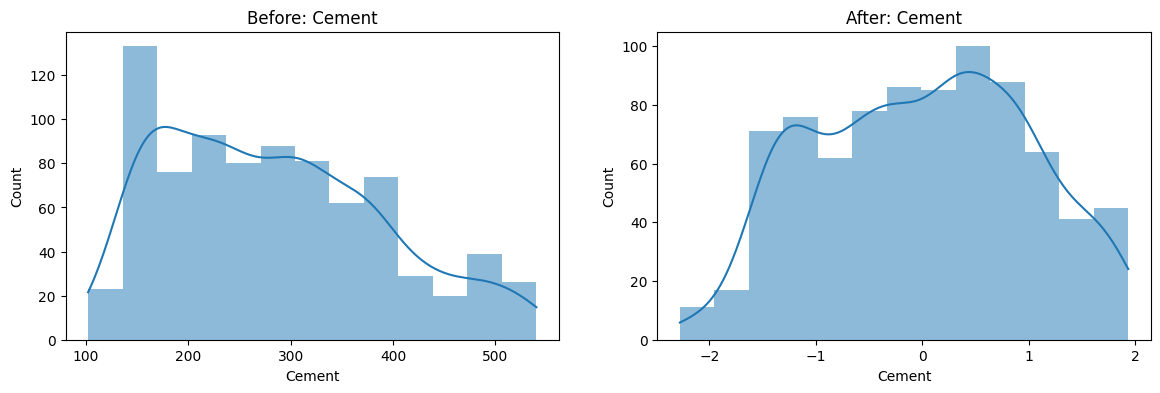

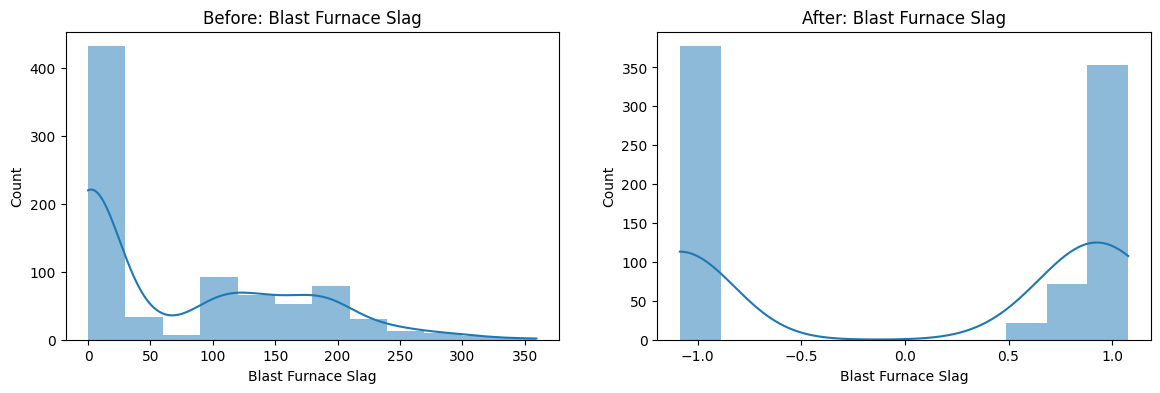

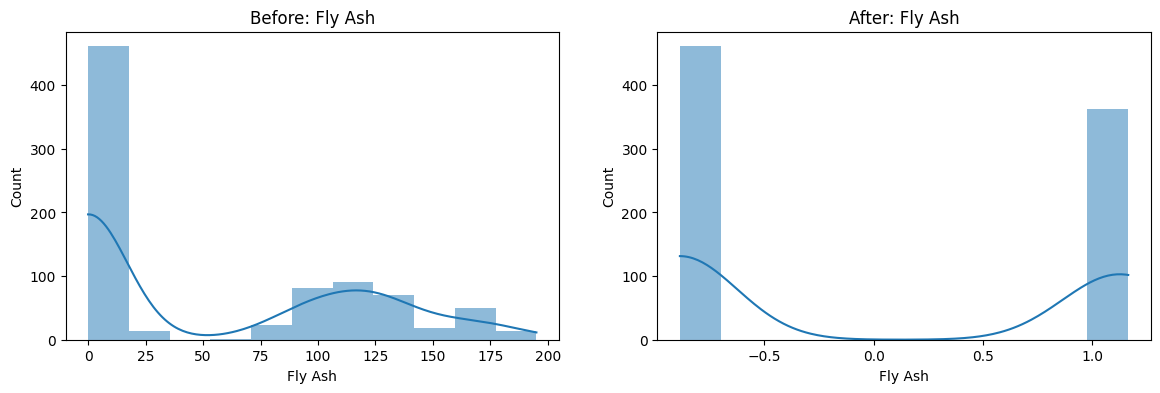

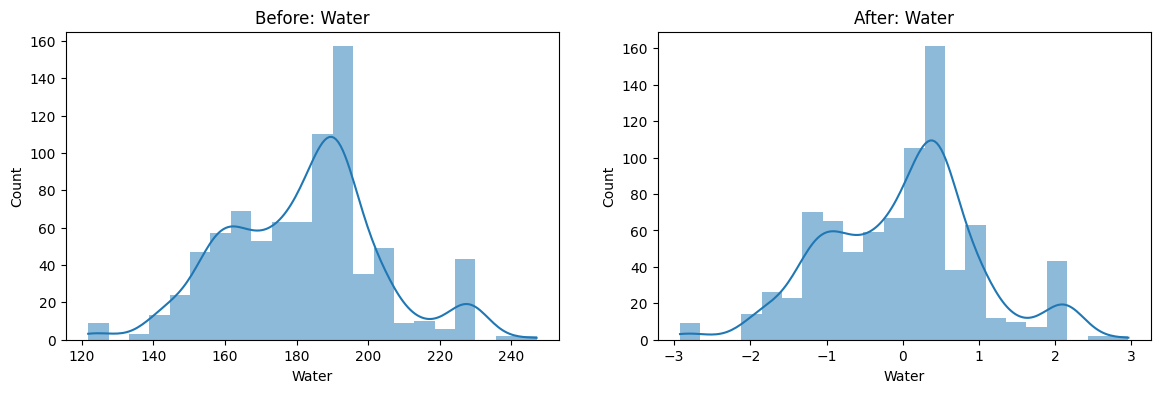

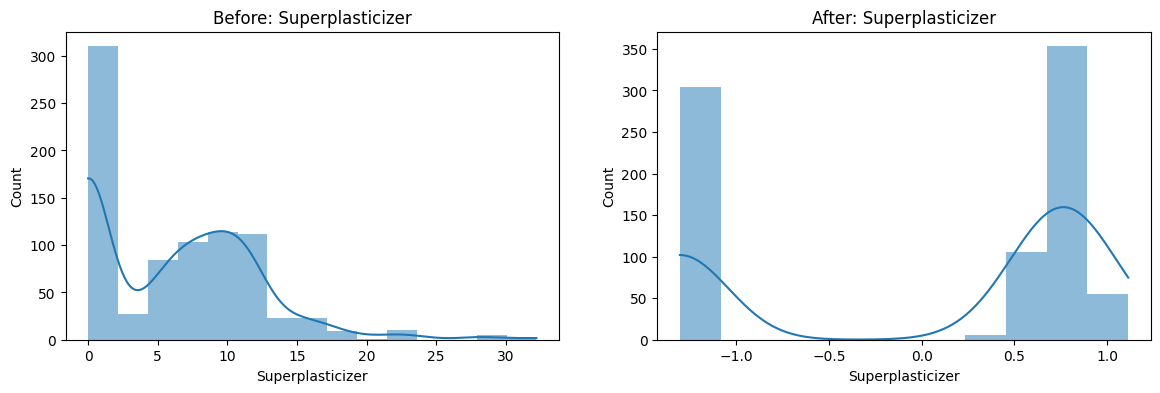

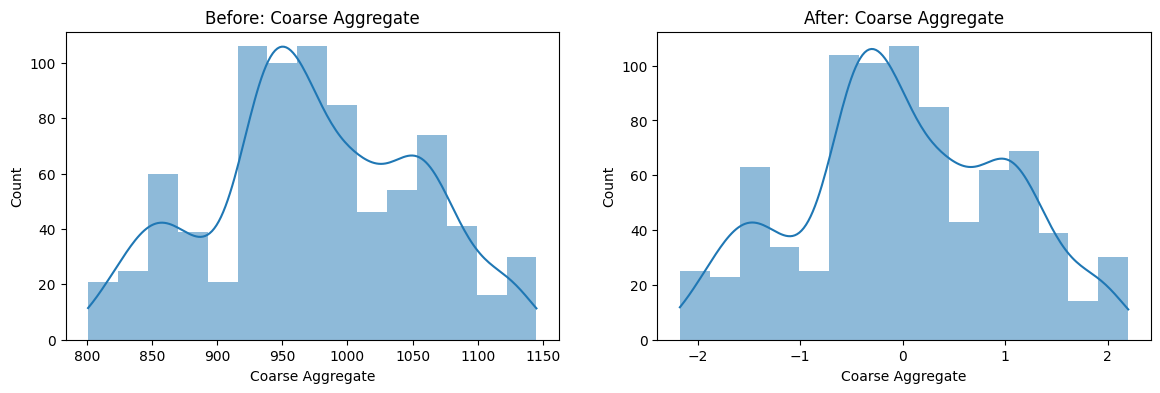

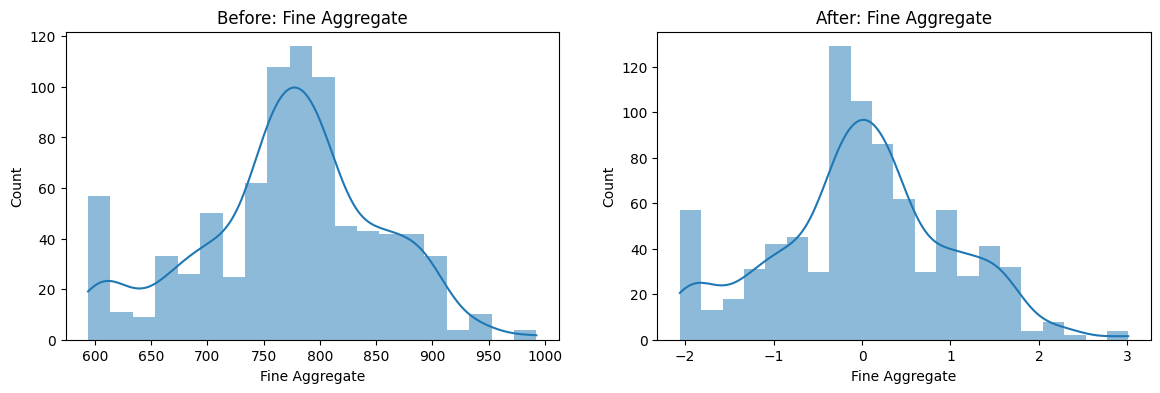

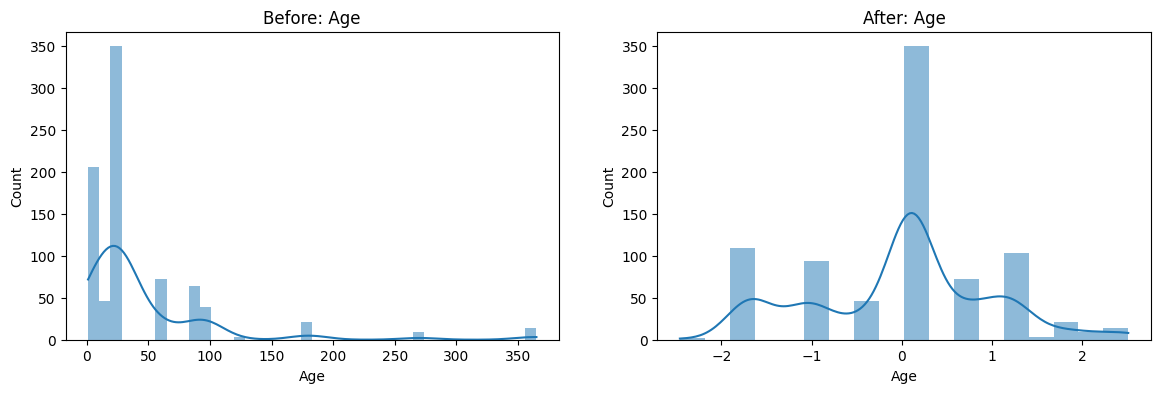

In [110]:
for col in X_train.columns:
  plt.figure(figsize=(14,4))
  plt.subplot(1,2,1)
  sns.histplot(X_train[col],kde=True, edgecolor=None)
  # sns.kdeplot(X_train[col])
  plt.title(f'Before: {col}')

  plt.subplot(1,2,2)
  sns.histplot(X_train_transformed[col],kde=True, edgecolor=None)
  plt.title(f'After: {col}')